### Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.leyers import Dense, LSTM

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Datos csv Bitcoin + S&P500

In [2]:
btc = pd.read_csv('Bitcoin .csv', sep=",", encoding = 'latin-1')
btc.shape

(2854, 7)

El dataset cuenta con 2854 registros y 7 columnas.

In [3]:
sp500 = pd.read_csv('S&P500.csv', sep=";", encoding='latin-1')
sp500.shape

(1966, 6)

El dataset cuenta con 1966 registros y 6 columnas.

### DATA WRANGLING
#### Se realiza el EDA y estadisticas descriptivas en dos etapas:
####  1) Para cada dataset en particular
####  2) Para el dataset ya unido

### 1) EDA

In [4]:
btc.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,USD
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,USD
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,USD
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,USD
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,USD


In [5]:
sp500.head()

,Date,S&P 500 Open,S&P 500 High,S&P 500 Low,S&P 500 Close*,S&P 500 Volume
0,Jul 08 2022,3888.26,3918.50,3869.34,3899.38,2844620000
1,Jul 07 2022,3858.85,3910.63,3858.85,3902.62,3337710000
2,Jul 06 2022,3831.98,3870.91,3809.37,3845.08,3613120000
3,Jul 05 2022,3792.61,3832.19,3742.06,3831.39,4427900000
4,Jul 01 2022,3781.00,3829.82,3752.10,3825.33,3268240000


In [6]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2854 non-null   object 
 1   Open      2854 non-null   float64
 2   High      2854 non-null   float64
 3   Low       2854 non-null   float64
 4   Close     2854 non-null   float64
 5   Volume    2854 non-null   int64  
 6   Currency  2854 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 156.2+ KB


Valores nulos:
* El dataset no presenta valores nulos.

Tipos de datos:
* La columna 'Date' debe ser transformada a tipo datetime.
* Las columnas 'Open', 'High', 'Low', 'Close' son de tipo `float64`.
* La columna 'Volume' es de tipo `int64`.
* La columna 'Currency' de tipo `object`. 

In [7]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1966 non-null   object 
 1   S&P 500 Open    1966 non-null   float64
 2   S&P 500 High    1966 non-null   float64
 3   S&P 500 Low     1966 non-null   float64
 4   S&P 500 Close*  1966 non-null   float64
 5   S&P 500 Volume  1966 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 92.3+ KB


Valores nulos
* El dataset no presenta valores nulos.

Tipos de datos:

* La columna 'Date' debe ser transformada a tipo datetime.
* Las columnas 'Open', 'High', 'Low', 'Close*' son de tipo `float64`. 
* La columna  'Volume' es de tipo `int64` .

### 1) Estaditicas descriptivas

In [8]:
btc.describe()

,Open,High,Low,Close,Volume
count,2854.000000,2854.000000,2854.000000,2854.000000,2.854000e+03
mean,12444.903732,12768.600474,12081.369272,12450.552730,1.545053e+10
std,16577.341124,17005.417766,16080.505775,16572.919487,1.991923e+10
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06
25%,636.274521,642.085510,625.957230,637.079514,8.649955e+07
50%,6572.784912,6674.324951,6453.779785,6578.659912,5.864455e+09
75%,11538.891113,11854.514404,11288.520996,11568.815674,2.632111e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11


Interpretación de `btc.describe()`:las medias de todas las variables numéricas (menos 'Volume') rondan entre los 12,000 y 13,000 y el desvio estandar entre 16,000 y 18,000. Mas del 50% de los registros tienen un valor entre 6,400 y 6,700 en las variables numericas (menos 'Volume').


In [9]:
sp500.describe()

,S&P 500 Open,S&P 500 High,S&P 500 Low,S&P 500 Close*,S&P 500 Volume
count,1966.000000,1966.000000,1966.000000,1966.000000,1.966000e+03
mean,2886.647945,2901.945549,2869.673413,2886.849186,3.843598e+09
std,804.088647,809.465921,798.079041,804.010927,9.628574e+08
min,1833.400000,1847.000000,1810.100000,1829.080000,1.296540e+09
25%,2157.077500,2164.065000,2145.080000,2157.532500,3.267015e+09
50%,2729.250000,2742.765000,2711.760000,2727.940000,3.634260e+09
75%,3319.652500,3330.612500,3299.502500,3318.805000,4.151188e+09
max,4804.510000,4818.620000,4780.040000,4796.560000,9.878040e+09


Interpretación de `sp500.describe()`: las medias de todas las variables numéricas (menos 'Volume') rondan entre los 2,800 y 3,000 y el desvio estandar entre 7,000 y 8,000. Mas del 50% de los registros tienen un valor entre 2,700 y 2,800 en las variables numericas (menos 'Volume'). Se observa que los valores de las medias y del 50% de las variables numericas son similiares, lo que podria llevar a pensar que tiene un comportamiento mas simetrico/dist. normal. 

#### Transformamos la columna Date de (str) a (date)

In [10]:
btc['Date'] =  pd.to_datetime(btc['Date'])
#btc = btc.set_index('Date')

In [11]:
sp500['Date'] =  pd.to_datetime(sp500['Date'])
#sp500 = sp500.set_index('Date')

#### Creamos las columnas "Weekday" y "Weekend"

In [12]:
btc['Weekday'] = btc['Date'].dt.weekday

#Creating Weekend or NOT
btc['Weekend']  = btc['Weekday'] <= 5 

btc = btc.set_index('Date')
sp500 = sp500.set_index('Date')

btc

,Open,High,Low,Close,Volume,Currency,Weekday,Weekend
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,USD,2,True
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,USD,3,True
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,USD,4,True
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,USD,5,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,USD,6,False
...,...,...,...,...,...,...,...,...
2022-07-06,20194.619141,20595.529297,19823.511719,20548.246094,24598943708,USD,2,True
2022-07-07,20547.814453,21771.816406,20296.103516,21637.587891,25814972520,USD,3,True
2022-07-08,21637.154297,22314.941406,21257.453125,21731.117188,49899834488,USD,4,True


#### Se realiza el "merge" de los datasets

In [13]:
btc_sp = btc.merge(sp500,on='Date',how='outer')
# btc_sp = btc_sp.drop(btc_sp['Currency'],axis=1)

### 2) EDA

In [14]:
btc_sp.head(10)

,Open,High,Low,Close,Volume,Currency,Weekday,Weekend,S&P 500 Open,S&P 500 High,S&P 500 Low,S&P 500 Close*,S&P 500 Volume
Date,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,USD,2,True,1999.30,2010.74,1993.29,2001.57,3.209420e+09
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,USD,3,True,2003.07,2012.34,2003.07,2011.36,3.235340e+09
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,USD,4,True,2012.74,2019.26,2006.59,2010.40,4.880220e+09
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,USD,5,True,NaN,NaN,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,USD,6,False,NaN,NaN,NaN,NaN,NaN
2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600,USD,0,True,2009.08,2009.08,1991.01,1994.29,3.349670e+09
2014-09-23,402.092010,441.557007,396.196991,435.790985,45099500,USD,1,True,1992.78,1995.41,1982.77,1982.77,3.279350e+09
2014-09-24,435.751007,436.112000,421.131989,423.204987,30627700,USD,2,True,1983.34,1999.79,1978.63,1998.30,3.313850e+09
2014-09-25,423.156006,423.519989,409.467987,411.574005,26814400,USD,3,True,1997.32,1997.32,1965.99,1965.99,3.273050e+09


In [15]:
btc_sp.shape

(2854, 13)

In [16]:
btc_sp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2854 entries, 2014-09-17 to 2022-07-10
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            2854 non-null   float64
 1   High            2854 non-null   float64
 2   Low             2854 non-null   float64
 3   Close           2854 non-null   float64
 4   Volume          2854 non-null   int64  
 5   Currency        2854 non-null   object 
 6   Weekday         2854 non-null   int64  
 7   Weekend         2854 non-null   bool   
 8   S&P 500 Open    1966 non-null   float64
 9   S&P 500 High    1966 non-null   float64
 10  S&P 500 Low     1966 non-null   float64
 11  S&P 500 Close*  1966 non-null   float64
 12  S&P 500 Volume  1966 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 292.6+ KB


Valores nulos:
* El dataset presenta 888 valores nulos en las columnas provenientes del S&P, que seran rellenados utilizando el metodo "backfill" o "hacia atras" a continuacion.

Tipos de datos:
* Los tipos de datos son los mismos que detallaron anteriormente


In [17]:
btc_sp = btc_sp.fillna(method='backfill')

In [18]:
btc_sp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2854 entries, 2014-09-17 to 2022-07-10
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            2854 non-null   float64
 1   High            2854 non-null   float64
 2   Low             2854 non-null   float64
 3   Close           2854 non-null   float64
 4   Volume          2854 non-null   int64  
 5   Currency        2854 non-null   object 
 6   Weekday         2854 non-null   int64  
 7   Weekend         2854 non-null   bool   
 8   S&P 500 Open    2852 non-null   float64
 9   S&P 500 High    2852 non-null   float64
 10  S&P 500 Low     2852 non-null   float64
 11  S&P 500 Close*  2852 non-null   float64
 12  S&P 500 Volume  2852 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 292.6+ KB


Valores nulos
* El dataset presenta dos valores nulos en las columnas del S&P, por lo tanto, se eliminan a continuacion.

In [19]:
btc_sp = btc_sp.drop(['2022-07-09','2022-07-10'],axis=0)

btc_sp.isna().sum()
btc_sp.shape

(2852, 13)

In [20]:
btc_sp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2852 entries, 2014-09-17 to 2022-07-08
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            2852 non-null   float64
 1   High            2852 non-null   float64
 2   Low             2852 non-null   float64
 3   Close           2852 non-null   float64
 4   Volume          2852 non-null   int64  
 5   Currency        2852 non-null   object 
 6   Weekday         2852 non-null   int64  
 7   Weekend         2852 non-null   bool   
 8   S&P 500 Open    2852 non-null   float64
 9   S&P 500 High    2852 non-null   float64
 10  S&P 500 Low     2852 non-null   float64
 11  S&P 500 Close*  2852 non-null   float64
 12  S&P 500 Volume  2852 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 292.4+ KB


Se observe que el dataset ya no tienen valores nulos.

### 2) Estadistica descriptiva

#### Utiizamos ECDF´s plot para observar la distribución de los precios de BITCOIN

In [21]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

In [22]:
ecdf_Open_x, ecdf_Open_y = ecdf(btc_sp.Open)
ecdf_High_x, ecdf_High_y = ecdf(btc_sp.High)
ecdf_Low_x, ecdf_Low_y = ecdf(btc_sp.Low)
ecdf_Close_x, ecdf_Close_y = ecdf(btc_sp.Close)
ecdf_Volume_x, ecdf_Volume_y = ecdf(btc_sp.Volume)

#### Ploteamos nuestro ECDF 

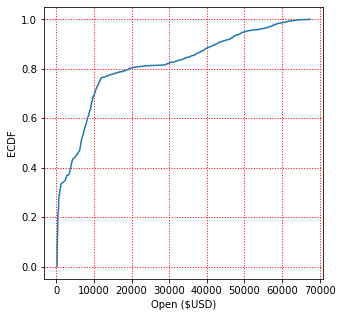

In [23]:
plt.figure(figsize=(5,5))
#plt.plot(ecdf_open_x, ecdf_open_y, marker='.',linestyle='-')
plt.plot(ecdf_Open_x, ecdf_Open_y)
plt.xlabel('Open ($USD)')
plt.ylabel('ECDF')
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.show()

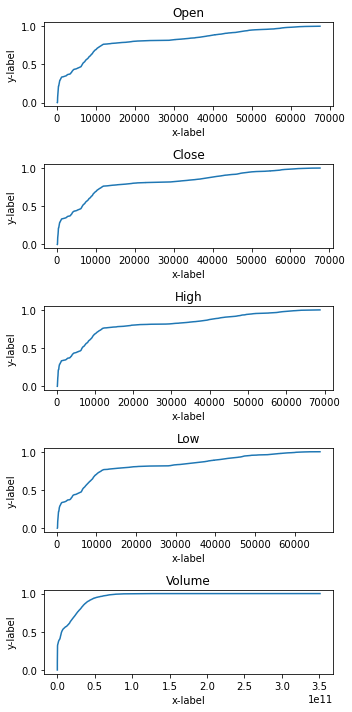

In [24]:
# usar subplots: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(5, 10))
axs[0].plot(ecdf_Open_x, ecdf_Open_y)
axs[0].set_title('Open')
axs[1].plot(ecdf_Close_x, ecdf_Close_y)
axs[1].set_title('Close')
axs[2].plot(ecdf_High_x, ecdf_High_y)
axs[2].set_title('High')
axs[3].plot(ecdf_Low_x, ecdf_Low_y)
axs[3].set_title('Low')
axs[4].plot(ecdf_Volume_x, ecdf_Volume_y)
axs[4].set_title('Volume')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

fig.tight_layout()
plt.show()

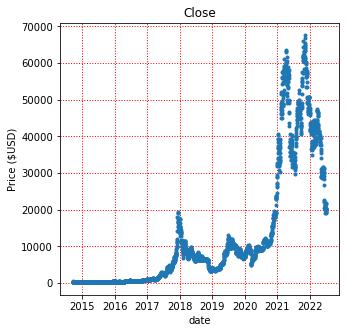

In [25]:
date = btc_sp.index
close = btc_sp['Close']

plt.figure(figsize=(5,5))
plt.plot(date, close, marker='.', linestyle='none')
plt.xlabel('date')
plt.ylabel('Price ($USD)')
plt.title('Close')
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.show()

Interpretación de serie de tiempo: se observa que en el periodo entre 2015 y comiendo de 2017 el valor de cierre se comporta de forma estable. En 2018, alcanza el primer pico de mayor valor. Luego, en 2021 alcanza el maximo y empieza a disminuir hasta 2022 pero de todas formas no rompe con el soporte correspondiente al pico de 2018. 
Por otro lado, en los primeros años se observa poca variabilidad en los datos reflejados casi como una linea. Luego, el comportamiento cambia, lo que lleva a pensar que se vio influenciado por diversos factores socio-politicos. 


#### Box Plot para observar mejor OUTLIERS

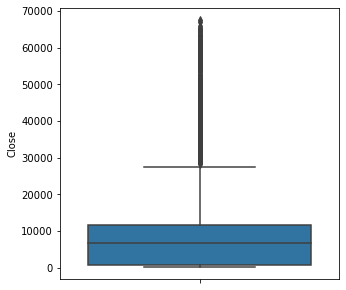

In [26]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Close', data=btc_sp)
plt.ylabel('Close')
plt.show()

Interpretación de boxplot: se observa gran cantidad de outliers. El 50% de los valores de Close rondaron en 8000 y el 75%, en 30000. Se puede pensar en una asimetria a la derecha.

#### Correlación de los FEATURES

<AxesSubplot:>

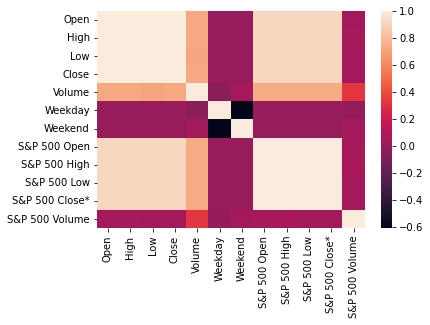

In [27]:
sns.heatmap(btc_sp.corr())

Interpretación de mapa de corrleación: se observa una correlacion positiva entre los valores de las variables numericas de Bitcoin con S&P500 (menos para la columna Volume, donde si bien es positiva, no es tan fuerte).

# Modelo

In [28]:
btc_sp

,Open,High,Low,Close,Volume,Currency,Weekday,Weekend,S&P 500 Open,S&P 500 High,S&P 500 Low,S&P 500 Close*,S&P 500 Volume
Date,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,USD,2,True,1999.30,2010.74,1993.29,2001.57,3.209420e+09
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,USD,3,True,2003.07,2012.34,2003.07,2011.36,3.235340e+09
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,USD,4,True,2012.74,2019.26,2006.59,2010.40,4.880220e+09
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,USD,5,True,2009.08,2009.08,1991.01,1994.29,3.349670e+09
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,USD,6,False,2009.08,2009.08,1991.01,1994.29,3.349670e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-04,19297.314453,20258.748047,19063.066406,20231.261719,21594638208,USD,0,True,3792.61,3832.19,3742.06,3831.39,4.427900e+09
2022-07-05,20225.353516,20635.466797,19341.232422,20190.115234,26715546990,USD,1,True,3792.61,3832.19,3742.06,3831.39,4.427900e+09
2022-07-06,20194.619141,20595.529297,19823.511719,20548.246094,24598943708,USD,2,True,3831.98,3870.91,3809.37,3845.08,3.613120e+09


#### Separamos las variables independientes en la matriz X y la variable dependiente en el vector y.

In [29]:
X = btc_sp.drop(columns=['Close','Currency'])
y = btc_sp.iloc[:, 3].values

#### Dividimos el conjunto de datos en dos conjuntos para entrenamiento y prueba

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42,)

#### Estandarizamos las escalas para las variables analizadas

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
#Verificamos
X_train

array([[-0.68057286, -0.68140457, -0.67942938, ..., -0.6766257 ,
        -0.68329562, -0.550448  ],
       [-0.72467218, -0.72577099, -0.72507096, ..., -1.02685303,
        -1.03476474, -0.01017306],
       [-0.71685379, -0.71813466, -0.71716316, ..., -0.8704924 ,
        -0.87934968, -0.83078111],
       ...,
       [-0.39252973, -0.39013687, -0.38426332, ..., -0.38943754,
        -0.40709171, -0.61098654],
       [-0.32623332, -0.31195184, -0.31575517, ..., -0.37548993,
        -0.34576128, -0.42238291],
       [-0.6975503 , -0.69857553, -0.69808003, ..., -0.76143613,
        -0.76030889,  0.01309256]])

In [33]:
#Verificamos
X_test

array([[-0.53105234, -0.53619478, -0.52724432, ..., -0.38183884,
        -0.38523492, -0.13948788],
       [-0.7354483 , -0.73624738, -0.73618257, ..., -1.00985595,
        -1.01135826, -0.20419215],
       [-0.36469528, -0.37241493, -0.35432603, ..., -0.15836473,
        -0.17042344, -0.51160253],
       ...,
       [-0.73794766, -0.7386909 , -0.73863673, ..., -0.96333895,
        -0.95444134, -0.69820661],
       [-0.04381159, -0.03440269, -0.05480287, ..., -0.03563582,
        -0.01435131,  0.3705959 ],
       [-0.26225597, -0.27146191, -0.25152425, ..., -0.09726273,
        -0.11250232, -0.57551531]])

In [34]:
#Verificamos
y_train

array([1211.67004395,  458.54800415,  587.559021  , ..., 6031.60009766,
       7456.10986328,  892.68701172])

In [35]:
#Verificamos
y_test

array([ 3661.30102539,   279.58499146,  6489.18994141,  3252.90991211,
        9123.41015625, 50538.2421875 ,   386.35400391, 33155.84765625,
         604.72802734,   247.27200317,   458.53601074,  2506.37011719,
        2754.86010742,  4122.93994141, 33114.359375  , 48116.94140625,
        7780.43994141, 18321.14453125,  9900.76757812, 16068.13867188,
        7511.58886719,  6467.06982422, 10334.97460938,  9003.0703125 ,
         651.78399658,  8491.9921875 ,   654.09698486,  3236.76171875,
       10895.08984375,  6792.83007812, 47128.00390625,  2757.17993164,
        1172.52001953,  8058.66992188,  2659.62988281,   711.52197266,
        7707.77099609,  2084.72998047,   414.06500244,  3154.94995117,
        1578.80004883,  8321.75683594,   705.02099609,  9087.30371094,
        7218.37109375,  9337.54980469,  6238.04980469,  3378.93994141,
         447.61099243, 58119.578125  ,  9598.17382812,   463.61599731,
        9228.32519531,   254.32000732,  4610.47998047, 29374.15234375,
      

### PCA

In [36]:
from sklearn.decomposition import PCA

#### Aplicamos el PCA para reducir la dimensión de 11 a 2 variables.

In [37]:
pca = PCA()
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#### Los conjuntos de X_train y X_test quedaron ahora con 2 variables de la siguiente manera:

In [38]:
X_train

array([[-1.97508515, -0.94784729],
       [-2.54112603,  2.75290984],
       [-2.31664186,  0.12245816],
       ...,
       [-1.22776443,  0.47715965],
       [-1.034775  , -0.94961554],
       [-2.09783862, -0.99962718]])

In [39]:
X_test

array([[-1.30676189,  0.42490888],
       [-2.5055381 ,  0.06312725],
       [-0.83198347,  0.47472164],
       ...,
       [-2.45529851, -0.59512682],
       [ 0.05725407, -1.04695998],
       [-0.63266265,  0.48407117]])

#### Explicación de la varianza de las componentes

In [40]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.66862041, 0.14755361])

El primer componente explica el 66.8% de la variabilidad de los datos y el segundo el 14.7%

### Prediccion

Para comprobar que las dos componentes resultantes representan a las 11 variables originales vamos a hacer 
la predicción de la variable dependiente con la regresión lineal multiple, comprobando los resultados de predicción
con distintas metricas.

Supuestos del modelo de regresión lineal múltiple:
Para poder crear un modelo de regresión lineal es necesario que se cumpla con los siguientes
supuestos:
* Linealidad: Que la relación entre las variables sea lineal.
* Independencia: Que los errores en la medición de las variables explicativas sean
independientes entre sí.
* Homocedasticidad: Que los errores tengan varianza constante.
* Normalidad: Que las variables sigan la Ley Normal.
* No colinealidad: Que las variables independientes no estén correlacionadas entre ellas.

In [41]:
# Creating regressor
reg = LinearRegression().fit(X_train,y_train)

In [42]:
reg.coef_

array([5945.13952645,  181.18933092])

In [43]:
reg.intercept_

12541.516388595026

In [44]:
y_pred = reg.predict(X_test)

### Metricas

In [45]:
from sklearn.metrics import accuracy_score

In [53]:
reg.score(X_train, y_train)

0.9379983125450726

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### MAE

In [48]:
mean_absolute_error(y_test, y_pred)

3124.9241361542004

#### MSE

In [49]:
mean_squared_error(y_test, y_pred)

16776350.252308112

In [50]:
results = pd.DataFrame()
results['actual'] = y_test.tolist()
results['pred'] = y_pred.tolist()

results

,actual,pred
0,3661.301025,4849.623563
1,279.584991,-2342.819194
2,6489.189941,7681.273075
3,3252.909912,3096.772878
4,9123.410156,14030.182147
...,...,...
566,253.828003,-2043.125313
567,10549.329102,19889.732640
568,237.283005,-2163.406464
569,11478.168945,12692.201849


<AxesSubplot:xlabel='actual', ylabel='pred'>

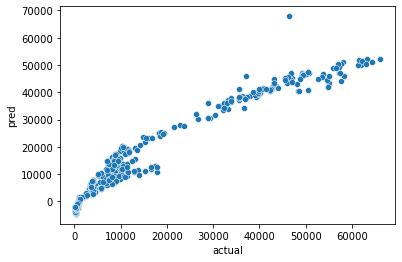

In [51]:
sns.scatterplot(data=results, x='actual', y='pred')